# <u>LightGBM (LGBM)</u>


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Primero se cargan los conjuntos de datos.

In [2]:
# Conjunto de datos de prueba
df_test = pd.read_csv('/home/carolina/Escritorio/Astrometria/practicos/Astrometria-2025/practico5_astrometria/galaxy_forming_burst_test.csv')
df_test.head()

,ID,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err
0,1237656906355048679,359.882500,-1.011695,19.34624,18.21367,17.75281,17.43699,17.23576,18.259090,51.824020,...,20.46436,19.85486,19.57471,0.349946,0.336899,0.342106,0.336519,0.316463,0.076849,0.000012
1,1237648721225711796,168.508873,-0.007002,20.08095,18.58526,17.82388,17.35917,17.01471,9.279436,36.803690,...,19.69541,18.53301,18.33405,0.300323,0.292062,0.304036,0.311175,0.337448,0.072482,0.000009
2,1237655473438851815,260.209844,26.321156,22.92703,20.01030,18.46797,17.73924,17.28094,0.645773,9.904737,...,22.06661,19.84510,19.27482,0.137121,0.679532,0.661082,0.665039,0.767354,0.323387,0.000057
3,1237651274034184295,125.648654,52.388509,19.28477,17.77666,16.92267,16.47363,16.18417,19.322850,77.505940,...,19.22704,17.94705,17.69468,0.597250,0.874807,0.918937,0.889690,0.838195,0.091731,0.000010
4,1237661125612142849,125.846050,25.560856,18.64250,17.84922,17.69156,17.56612,17.48753,34.913430,72.495770,...,18.96511,18.79242,18.83481,0.421484,0.418764,0.461124,0.467602,0.421164,0.027804,0.000006


In [3]:
# Conjunto de datos de entrenamiento
df_train = pd.read_csv('/home/carolina/Escritorio/Astrometria/practicos/Astrometria-2025/practico5_astrometria/galaxy_forming_burst_train.csv')
df_train.head()


,ID,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err,target
0,1237663542066479839,316.862138,-0.895678,19.01775,17.64755,17.06249,16.70350,16.49018,24.71067,87.29298,...,19.10930,18.70515,0.671345,0.651463,0.666413,0.690870,0.621546,0.096112,0.000009,1
1,1237655124482064438,206.623360,3.878296,17.04417,15.99764,15.55414,15.37217,15.18734,152.17130,398.97420,...,18.04992,17.76888,0.367797,0.279793,0.260749,0.232302,0.240708,0.017826,0.000006,0
2,1237655501889667673,258.396808,29.744604,19.07817,17.60122,16.84234,16.36071,16.06588,23.37314,91.09844,...,18.18285,17.70473,0.292335,0.307789,0.323592,0.328726,0.323058,0.080695,0.000008,1
3,1237648722837700815,171.667200,1.135270,18.92527,17.69376,16.97346,16.52742,16.25693,26.90786,83.65588,...,17.73501,17.39894,0.648844,0.734394,0.779769,0.773851,0.777902,0.137939,0.000008,0
4,1237655469672890715,229.001991,2.406898,18.13839,16.88722,16.26597,15.89510,15.62886,55.54449,175.83760,...,18.22657,17.90952,0.443804,0.372774,0.364403,0.368019,0.372280,0.038428,0.000008,1


## `Graficos con analisis exploratorio de Datos`

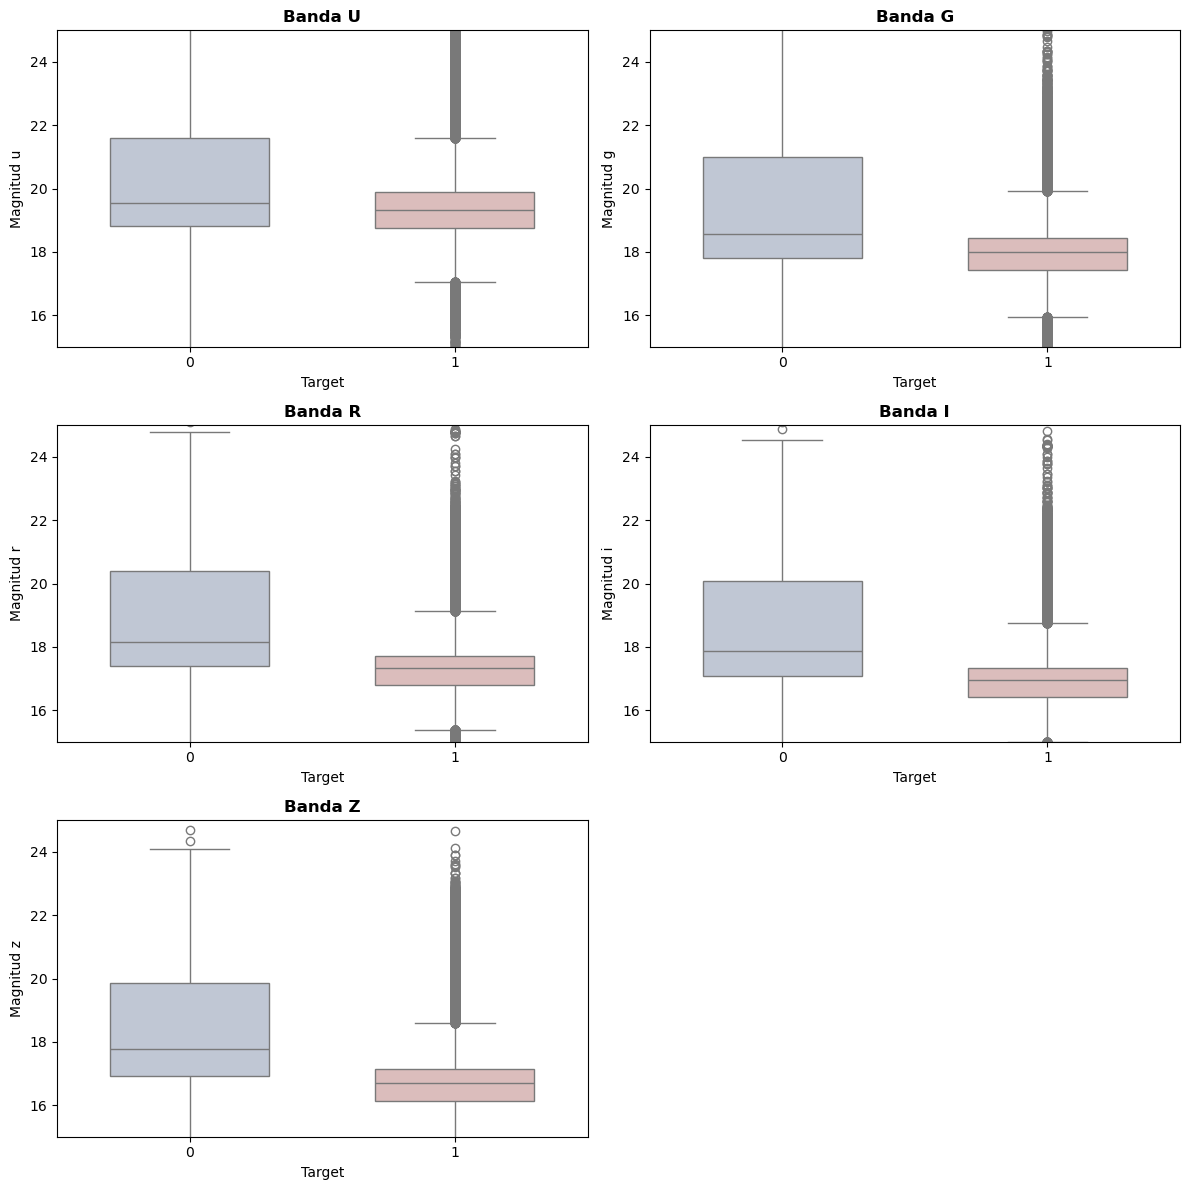

In [4]:
# Crear figura con subplots para las 5 bandas (3 filas x 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
bands = ['u', 'g', 'r', 'i', 'z']

# Aplanar el array de axes para iterar fácilmente
axes = axes.flatten()

for idx, band in enumerate(bands):
    sns.boxplot(data=df_train, x="target", y=band, hue="target", 
                width=.6, palette="vlag", legend=False, ax=axes[idx])
    axes[idx].set_title(f'Banda {band.upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Target', fontsize=10)
    axes[idx].set_ylabel(f'Magnitud {band}', fontsize=10)
    axes[idx].set_ylim(15, 25)

# Eliminar el último subplot (posición 6) ya que solo tenemos 5 bandas
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

Los gráficos muestran claramente las diferencias en las distribuciones de magnitudes entre las dos clases de galaxias (target 0 y 1) para cada banda fotométrica. Se observa clara separacion entre las clases.

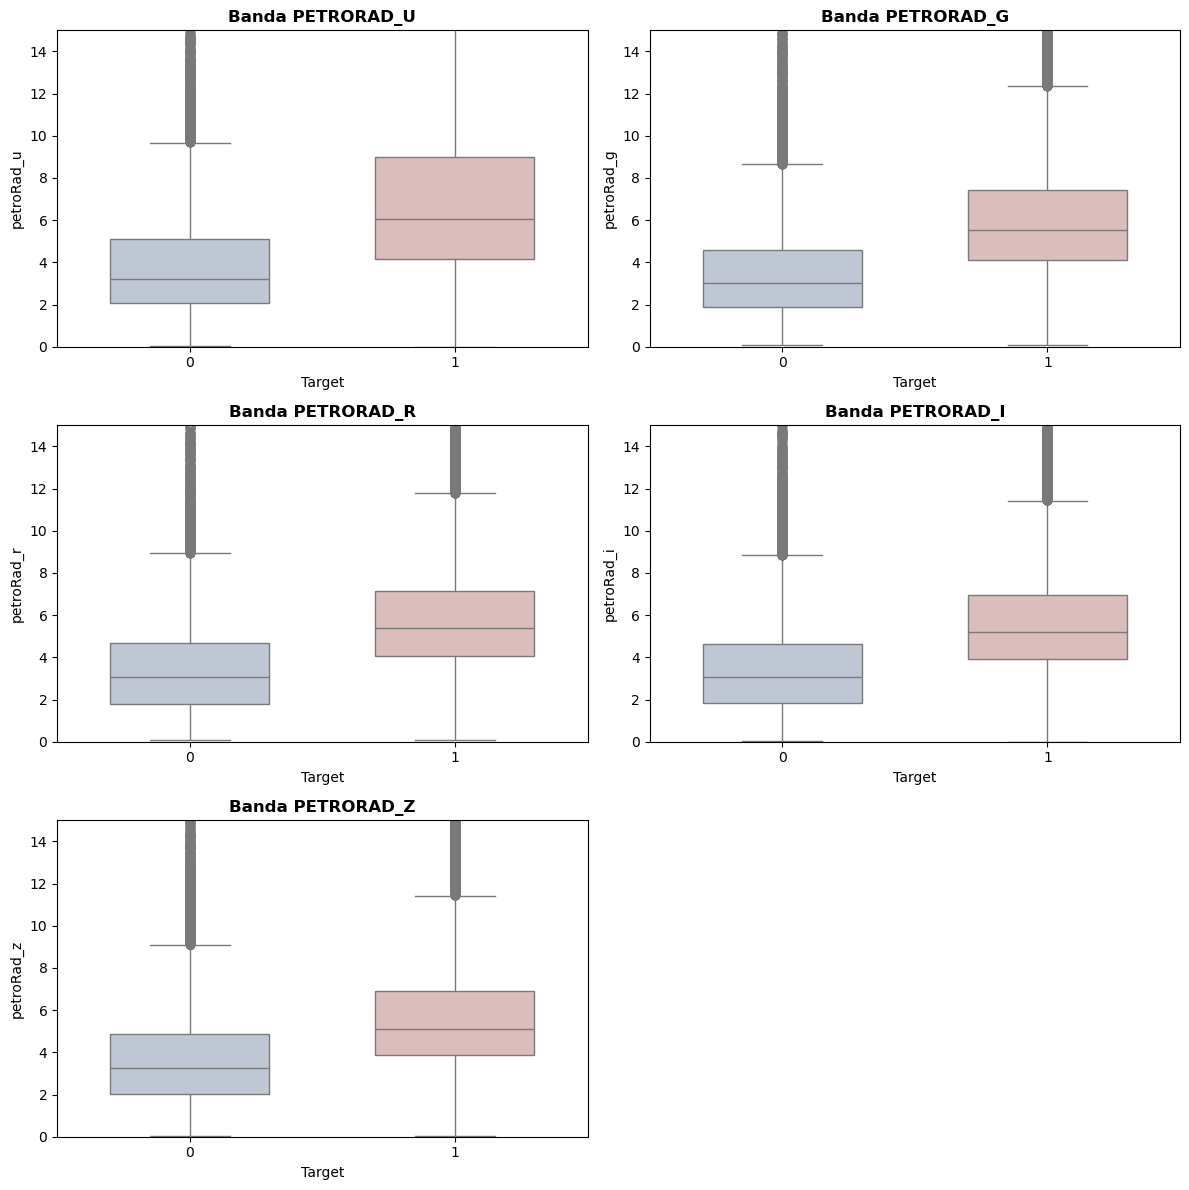

In [5]:
# Crear figura con subplots para las 5 bandas (3 filas x 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
petroRad_bands = ['petroRad_u', 'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z']

# Aplanar el array de axes para iterar fácilmente
axes = axes.flatten()

for idx, band in enumerate(petroRad_bands):
    sns.boxplot(data=df_train, x="target", y=band, hue="target", 
                width=.6, palette="vlag", legend=False, ax=axes[idx])
    axes[idx].set_title(f'Banda {band.upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Target', fontsize=10)
    axes[idx].set_ylabel(f'{band}', fontsize=10)
    # Ajustar el rango del eje Y
    axes[idx].set_ylim(0, 15)  

# Eliminar el último subplot (posición 6) ya que solo tenemos 5 bandas
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

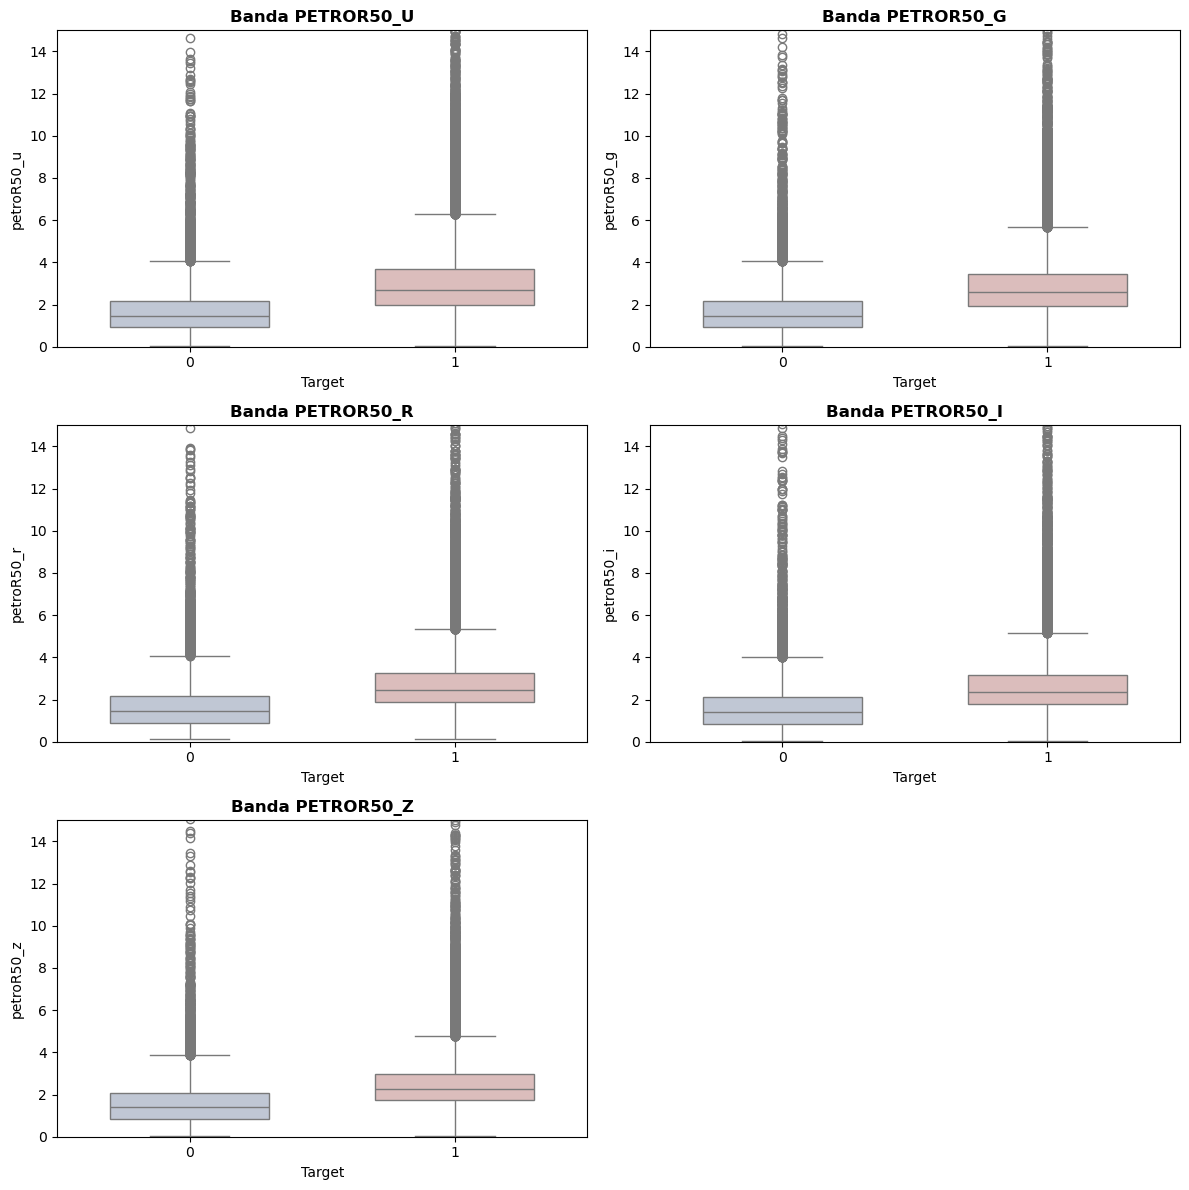

In [6]:
# Crear figura con subplots para las 5 bandas (3 filas x 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
petroR50_bands = ['petroR50_u', 'petroR50_g', 'petroR50_r', 'petroR50_i', 'petroR50_z']

# Aplanar el array de axes para iterar fácilmente
axes = axes.flatten()

for idx, band in enumerate(petroR50_bands):
    sns.boxplot(data=df_train, x="target", y=band, hue="target", 
                width=.6, palette="vlag", legend=False, ax=axes[idx])
    axes[idx].set_title(f'Banda {band.upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Target', fontsize=10)
    axes[idx].set_ylabel(f'{band}', fontsize=10)
    # Ajustar el rango del eje Y
    axes[idx].set_ylim(0, 15)  

# Eliminar el último subplot (posición 6) ya que solo tenemos 5 bandas
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

(0.0, 6e-05)

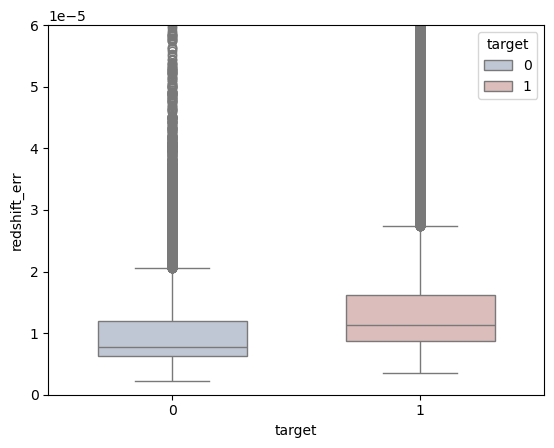

In [7]:
sns.boxplot(df_train, x="target", y="redshift_err", hue="target", width=.6, palette="vlag")
plt.ylim(0.0, 0.00006)

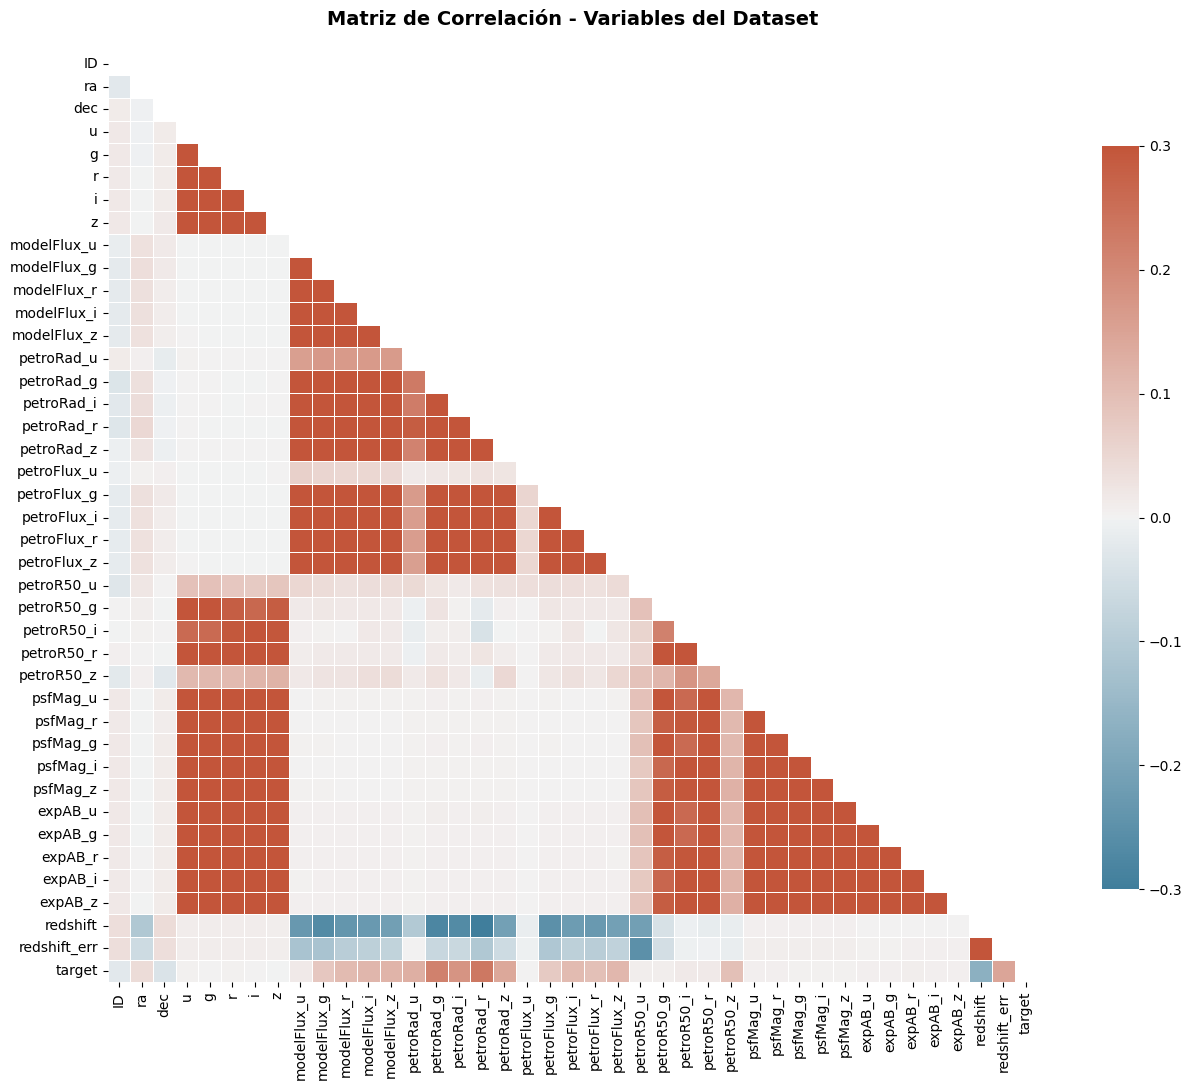

In [8]:
# Calcular la matriz de correlación
matriz_correlacion = df_train.corr()

# Generar una máscara para el triángulo superior (evitar duplicados)
mascara = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

# Configurar la figura de matplotlib
fig, ax = plt.subplots(figsize=(14, 11))

# Generar un mapa de colores divergente personalizado
mapa_colores = sns.diverging_palette(230, 20, as_cmap=True)

# Dibujar el heatmap con la máscara y aspecto correcto
sns.heatmap(matriz_correlacion, mask=mascara, cmap=mapa_colores, 
            vmin=-0.3, vmax=0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8},
            annot=False, fmt='.2f')

plt.title('Matriz de Correlación - Variables del Dataset', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Variables importantes para clasificación:

-Las variables con correlación moderada con target son las más útiles para el modelo
-Redshift muestra algunas correlaciones interesantes con otras variables

Multicolinealidad:

-Hay mucha multicolinealidad (variables muy correlacionadas entre sí). Esto puede afectar algunos modelos, pero Random Forest maneja bien la multicolinealidad

### Análisis de Correlaciones con Target

Antes de entrenar el modelo Random Forest, es fundamental entender **qué variables tienen mayor relación con nuestra variable objetivo (target)**. Esto nos permite:

1. **Identificar las características más predictivas**: Variables con correlación moderada-alta son las que mejor distinguen entre clases
2. **Detectar variables redundantes**: Si dos variables están muy correlacionadas entre sí, aportan información similar
3. **Optimizar el modelo**: Podemos priorizar o eliminar variables según su poder predictivo
4. **Entender el problema**: Las correlaciones nos dan insights sobre qué características físicas diferencian a las galaxias

#### ¿Qué buscamos en las correlaciones con target?

- **Correlación moderada: La variable es útil pero no redundante
- **Correlación baja: Poco poder predictivo, puede añadir ruido
- **Correlación muy alta: Posible data leakage o redundancia

A continuación, calculamos y visualizamos las correlaciones de todas las variables con `target` para identificar cuáles son las más importantes para nuestro modelo de clasificación.

CORRELACIÓN DE VARIABLES CON TARGET (ordenadas)
target          1.000000
petroRad_r      0.233720
petroRad_g      0.214498
petroRad_i      0.178160
redshift_err    0.147438
petroRad_z      0.141290
petroRad_u      0.127965
modelFlux_z     0.118146
modelFlux_i     0.112880
petroFlux_z     0.112112
petroFlux_i     0.104896
modelFlux_r     0.103338
petroFlux_r     0.094990
petroR50_z      0.094759
modelFlux_g     0.079974
petroFlux_g     0.077029
ra              0.042059
modelFlux_u     0.016205
petroR50_i      0.014810
petroR50_r      0.014681
petroR50_u      0.008760
expAB_r         0.008043
petroR50_g      0.007559
expAB_i         0.006721
psfMag_u        0.006221
expAB_z         0.005773
expAB_u         0.005735
psfMag_r        0.005680
expAB_g         0.005543
psfMag_g        0.004493
psfMag_i        0.004032
u               0.003414
r               0.002800
psfMag_z        0.002490
g               0.001794
i               0.001347
petroFlux_u     0.000152
z              -0.000006
ID

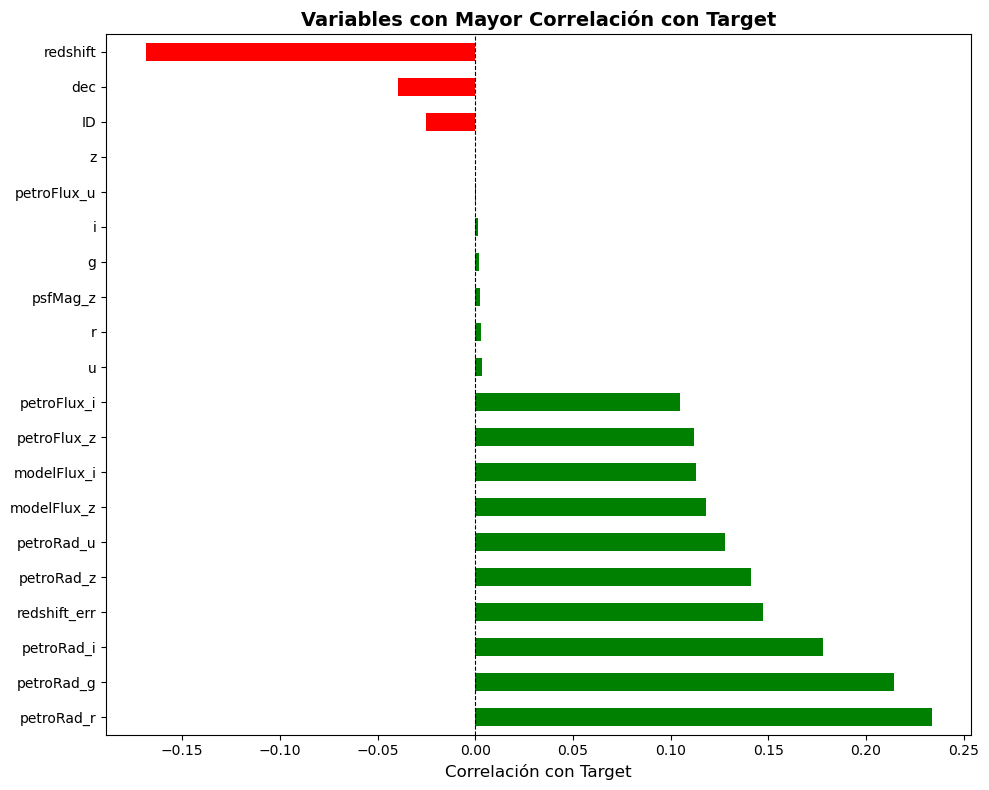

In [9]:
# Analizar la correlación de cada variable con 'target'
correlacion_con_target = df_train.corr()['target'].sort_values(ascending=False)

print("="*70)
print("CORRELACIÓN DE VARIABLES CON TARGET (ordenadas)")
print("="*70)
print(correlacion_con_target)

print("\n" + "="*70)
print("TOP 10 VARIABLES MÁS CORRELACIONADAS CON TARGET")
print("="*70)
print(correlacion_con_target.head(11)[1:])  # Excluir target consigo mismo

print("\n" + "="*70)
print("TOP 10 VARIABLES CON CORRELACIÓN NEGATIVA MÁS FUERTE")
print("="*70)
print(correlacion_con_target.tail(10))

# Visualizar las mejores correlaciones
fig, ax = plt.subplots(figsize=(10, 8))
top_correlaciones = pd.concat([
    correlacion_con_target.head(11)[1:],  # Top 10 positivas
    correlacion_con_target.tail(10)        # Top 10 negativas
])
colores = ['green' if x > 0 else 'red' for x in top_correlaciones.values]
top_correlaciones.plot(kind='barh', color=colores, ax=ax)
ax.set_xlabel('Correlación con Target', fontsize=12)
ax.set_title('Variables con Mayor Correlación con Target', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

## `Analisis de la estructura de los datos -> Limpieza de datos `

In [10]:
# Información básica de los conjuntos de datos
print("="*60)
print("CONJUNTO DE ENTRENAMIENTO (df_train)")
print("="*60)
print(f"Número de filas: {df_train.shape[0]}")
print(f"Número de columnas: {df_train.shape[1]}")
print(f"\nColumnas: {list(df_train.columns)}")
print(f"\nTipos de datos:")
print(df_train.dtypes)

CONJUNTO DE ENTRENAMIENTO (df_train)
Número de filas: 59998
Número de columnas: 41

Columnas: ['ID', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'redshift_err', 'target']

Tipos de datos:
ID                int64
ra              float64
dec             float64
u               float64
g               float64
r               float64
i               float64
z               float64
modelFlux_u     float64
modelFlux_g     float64
modelFlux_r     float64
modelFlux_i     float64
modelFlux_z     float64
petroRad_u      float64
petroRad_g      float64
petroRad_i      float64
petroRad_r      f

In [11]:
print("\n" + "="*60)
print("CONJUNTO DE PRUEBA (df_test)")
print("="*60)
print(f"Número de filas: {df_test.shape[0]}")
print(f"Número de columnas: {df_test.shape[1]}")
print(f"\nColumnas: {list(df_test.columns)}")
print(f"\nTipos de datos:")
print(df_test.dtypes)


CONJUNTO DE PRUEBA (df_test)
Número de filas: 40000
Número de columnas: 40

Columnas: ['ID', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'redshift_err']

Tipos de datos:
ID                int64
ra              float64
dec             float64
u               float64
g               float64
r               float64
i               float64
z               float64
modelFlux_u     float64
modelFlux_g     float64
modelFlux_r     float64
modelFlux_i     float64
modelFlux_z     float64
petroRad_u      float64
petroRad_g      float64
petroRad_i      float64
petroRad_r      float64
petroRad_z

Notamos que entre las muestras se distinguen por una columna "target".

In [12]:
# Estadísticas descriptivas del conjunto de entrenamiento
print("\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS (ENTRENAMIENTO)")
print("="*60)
df_train.describe()


ESTADÍSTICAS DESCRIPTIVAS (ENTRENAMIENTO)


,ID,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err,target
count,5.999800e+04,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,...,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000
mean,1.237659e+18,180.384569,23.449607,18.126597,16.865635,16.563169,16.037549,15.658734,30.055777,96.794240,...,17.691225,17.240204,-1.003568,-0.920878,-0.575042,-0.742777,-0.940974,0.117153,0.000014,0.749942
std,6.100020e+12,75.881812,21.172938,122.705999,122.690772,108.200242,115.664710,122.676784,69.571287,200.295311,...,115.678567,122.690936,122.462459,122.463432,108.004569,115.460737,122.463198,0.100733,0.000013,0.433050
min,1.237646e+18,0.009724,-11.244273,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-41.197150,-4.341232,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-0.000619,0.000002,0.000000
25%,1.237655e+18,138.640727,2.999227,18.765855,17.510082,16.903970,16.533660,16.289337,9.194943,34.240767,...,18.299955,17.996275,0.299999,0.399881,0.419802,0.419094,0.381224,0.055743,0.000008,0.000000
50%,1.237659e+18,181.463258,20.898735,19.351790,18.074330,17.462595,17.095825,16.863815,18.163075,58.910855,...,18.851620,18.568260,0.509175,0.589641,0.605789,0.605105,0.575589,0.085866,0.000011,1.000000
75%,1.237663e+18,223.754866,42.304939,20.090335,18.662650,17.939502,17.604725,17.465097,31.148128,99.017768,...,19.595282,19.303463,0.699986,0.770352,0.775132,0.774710,0.752549,0.135511,0.000015,1.000000
max,1.237681e+18,359.993947,68.694746,30.806540,29.323290,30.430370,30.562360,27.945680,7192.298000,9013.129000,...,25.966680,23.478590,1.000000,1.000000,0.999999,0.999999,0.999998,0.572899,0.000199,1.000000


In [13]:
# Estadísticas descriptivas del conjunto de prueba
print("\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS (PRUEBA)")
print("="*60)
df_test.describe()


ESTADÍSTICAS DESCRIPTIVAS (PRUEBA)


,ID,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err
count,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,1.237659e+18,180.863987,23.507057,19.106625,17.847067,17.209577,16.850184,16.139035,31.624601,101.921426,...,19.427684,18.513630,17.728979,-0.003891,0.075965,0.088850,0.088718,-0.441019,0.116154,0.000427
std,6.109423e+12,75.553877,21.092662,70.857800,70.849375,70.844491,70.842393,100.170583,85.962368,267.324073,...,70.851618,70.845623,100.180016,70.706683,70.707181,70.707248,70.707245,99.992128,0.099317,0.082518
min,1.237646e+18,0.008745,-11.200748,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,-11.935840,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-0.000833,0.000003
25%,1.237655e+18,138.941503,3.311895,18.756690,17.498020,16.890163,16.516310,16.269150,9.455754,34.726708,...,19.251368,18.289525,17.982107,0.300000,0.397487,0.417304,0.417922,0.381436,0.056027,0.000008
50%,1.237659e+18,181.538095,20.934352,19.347350,18.069970,17.454535,17.085105,16.855590,18.239615,59.155970,...,19.758795,18.837480,18.555120,0.508073,0.586307,0.603080,0.602872,0.575022,0.085830,0.000011
75%,1.237663e+18,224.079153,42.204431,20.060248,18.648165,17.910295,17.577510,17.437775,31.424298,100.171225,...,20.399640,19.573495,19.292885,0.699312,0.766260,0.772215,0.771340,0.751698,0.134560,0.000015
max,1.237681e+18,359.997922,68.695258,30.960000,30.420980,31.173560,27.217020,28.553240,7915.306000,18668.400000,...,25.117280,24.641680,27.043280,0.999984,0.999999,0.999998,1.000000,0.999998,0.568725,16.503710


Observamos valores como -9999.0 que podrian afectar mas adelante. Luego quiero ver cuantas columnas por parametro tienen dicho valor.

In [14]:
# Contar valores anomalos como -9999 en el conjunto de prueba
print("="*60)
print("BÚSQUEDA DE VALORES ANÓMALOS (-9999) EN PRUEBA")
print("="*60)

# Contar valores -9999 por columna
anomalous_counts_test = {}
for col in df_test.columns:
    count_9999 = (df_test[col] == -9999).sum()
    if count_9999 > 0:
        anomalous_counts_test[col] = count_9999
        print(f"\n{col}: {count_9999} valores con 9999 ({count_9999/len(df_test)*100:.2f}%)")

if not anomalous_counts_test:
    print("\nNo se encontraron valores -9999 en el conjunto de prueba")


BÚSQUEDA DE VALORES ANÓMALOS (-9999) EN PRUEBA

u: 2 valores con 9999 (0.01%)

g: 2 valores con 9999 (0.01%)

r: 2 valores con 9999 (0.01%)

i: 2 valores con 9999 (0.01%)

z: 4 valores con 9999 (0.01%)

petroR50_u: 607 valores con 9999 (1.52%)

petroR50_g: 67 valores con 9999 (0.17%)

petroR50_i: 51 valores con 9999 (0.13%)

petroR50_r: 30 valores con 9999 (0.07%)

petroR50_z: 354 valores con 9999 (0.89%)

psfMag_u: 2 valores con 9999 (0.01%)

psfMag_r: 2 valores con 9999 (0.01%)

psfMag_g: 2 valores con 9999 (0.01%)

psfMag_i: 2 valores con 9999 (0.01%)

psfMag_z: 4 valores con 9999 (0.01%)

expAB_u: 2 valores con 9999 (0.01%)

expAB_g: 2 valores con 9999 (0.01%)

expAB_r: 2 valores con 9999 (0.01%)

expAB_i: 2 valores con 9999 (0.01%)

expAB_z: 4 valores con 9999 (0.01%)


In [15]:
# Revisar también valores maximos por columna
print("\n" + "="*60)
print("VALORES MÁXIMOS POR COLUMNA (PRUEBA)")
print("="*60)
for col in df_test.select_dtypes(include=['float64', 'int64']).columns:
    max_val = df_test[col].max()
    if max_val > 1000:  # Mostrar solo valores grandes
        print(f"{col}: {max_val}")


VALORES MÁXIMOS POR COLUMNA (PRUEBA)
ID: 1237680530279302063
modelFlux_u: 7915.306
modelFlux_g: 18668.4
modelFlux_r: 31755.99
modelFlux_i: 51923.48
modelFlux_z: 79058.46
petroFlux_u: 12842.41
petroFlux_g: 26830.07
petroFlux_i: 73220.98
petroFlux_r: 49008.36
petroFlux_z: 85984.48


In [16]:
# Buscar valores anómalos como -9999 en el conjunto de entrenamiento
print("="*60)
print("BÚSQUEDA DE VALORES ANÓMALOS (-9999) EN ENTRENAMIENTO")
print("="*60)

# Contar valores 9999 por columna
anomalous_counts_train = {}
for col in df_train.columns:
    count_9999 = (df_train[col] == -9999).sum()
    if count_9999 > 0:
        anomalous_counts_train[col] = count_9999
        print(f"\n{col}: {count_9999} valores con -9999 ({count_9999/len(df_train)*100:.2f}%)")

if not anomalous_counts_train:
    print("\nNo se encontraron valores -9999 en el conjunto de entrenamiento")

BÚSQUEDA DE VALORES ANÓMALOS (-9999) EN ENTRENAMIENTO

u: 9 valores con -9999 (0.02%)

g: 9 valores con -9999 (0.02%)

r: 7 valores con -9999 (0.01%)

i: 8 valores con -9999 (0.01%)

z: 9 valores con -9999 (0.02%)

petroR50_u: 963 valores con -9999 (1.61%)

petroR50_g: 87 valores con -9999 (0.15%)

petroR50_i: 80 valores con -9999 (0.13%)

petroR50_r: 38 valores con -9999 (0.06%)

petroR50_z: 569 valores con -9999 (0.95%)

psfMag_u: 9 valores con -9999 (0.02%)

psfMag_r: 7 valores con -9999 (0.01%)

psfMag_g: 9 valores con -9999 (0.02%)

psfMag_i: 8 valores con -9999 (0.01%)

psfMag_z: 9 valores con -9999 (0.02%)

expAB_u: 9 valores con -9999 (0.02%)

expAB_g: 9 valores con -9999 (0.02%)

expAB_r: 7 valores con -9999 (0.01%)

expAB_i: 8 valores con -9999 (0.01%)

expAB_z: 9 valores con -9999 (0.02%)


In [17]:
# Revisar también valores maximos por columna
print("\n" + "="*60)
print("VALORES MÁXIMOS POR COLUMNA (ENTRENAMIENTO)")
print("="*60)
for col in df_train.select_dtypes(include=['float64', 'int64']).columns:
    max_val = df_train[col].max()
    if max_val > 1000:  # Mostrar solo valores grandes
        print(f"{col}: {max_val}")


VALORES MÁXIMOS POR COLUMNA (ENTRENAMIENTO)
ID: 1237680530810929644
modelFlux_u: 7192.298
modelFlux_g: 9013.129
modelFlux_r: 22205.48
modelFlux_i: 37970.16
modelFlux_z: 56688.75
petroFlux_u: 5091.803
petroFlux_g: 10103.74
petroFlux_i: 35993.26
petroFlux_r: 21312.13
petroFlux_z: 50039.27


Notamos que los valores -9999.0 en porcentajes son maximos en los parametros: petroR50_u, petroR50_g, petroR50_r, petroR50_i, petroR50_z.

Procedemos a preparar la muestra de entrenamiento para un entrenamiento optimo del Modelo Random Forest.

In [18]:
# --- 2. Manejo de -9999 (Placeholder)  ---

# Columnas de magnitud y forma identificadas con el placeholder -9999 en el EDA
cols_to_clean = [
    'u', 'g', 'r', 'i', 'z', 'petroR50_u', 'petroR50_g', 'petroR50_r', 'petroR50_i', 'petroR50_z',
    'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z',
    'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z'
]

# Reemplazar -9999.0 por NaN en ambos sets
df_train[cols_to_clean] = df_train[cols_to_clean].replace(-9999.0, np.nan)
df_test[cols_to_clean] = df_test[cols_to_clean].replace(-9999.0, np.nan)

# Calcular la mediana SOLO del set de entrenamiento
imputation_medians = df_train[cols_to_clean].median()

# Imputar NaN con la mediana del set de entrenamiento (evitando Data Leakage)
df_train[cols_to_clean] = df_train[cols_to_clean].fillna(imputation_medians)
df_test[cols_to_clean] = df_test[cols_to_clean].fillna(imputation_medians)

print(f" Valores -9999 reemplazados con la mediana.")



# --- 3. Manejo de Outliers ---

# Aplicar capping a variables importantes - alta correlación con target
outlier_cols_to_cap = [
    'redshift_err', 'petroRad_u', 'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z',
]

def handle_outliers_iqr(df, column):
    """Limita los valores extremos de una columna usando el rango intercuartílico (IQR)."""
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Aplicar capping: asignar el límite al valor que lo excede
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Aplicar la función de manejo de outliers a ambos DataFrames
outliers_procesados = 0
for col in outlier_cols_to_cap:
    if col in df_train.columns:
        df_train = handle_outliers_iqr(df_train, col)
        df_test = handle_outliers_iqr(df_test, col)
        outliers_procesados += 1

print(f" Outliers limitados (capping) en {outliers_procesados} variables importantes.")


# --- 5. Guardar los DataFrames Limpios y con Features ---
df_train.to_csv('galaxy_train_cleaned.csv', index=False)
df_test.to_csv('galaxy_test_cleaned.csv', index=False)


 Valores -9999 reemplazados con la mediana.
 Outliers limitados (capping) en 6 variables importantes.


## `Entrenamiento de Modelo`

In [19]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

print("Librerías importadas correctamente")

Librerías importadas correctamente


In [20]:
# Cargar los datos limpios
df_train_clean = pd.read_csv('galaxy_train_cleaned.csv')
df_test_clean = pd.read_csv('galaxy_test_cleaned.csv')

# Separar features (X) de la variable objetivo (y)
X_train = df_train_clean.drop(['target', 'ID'], axis=1)  # Eliminar target y objID
y_train = df_train_clean['target']

# Preparar el conjunto de prueba (no tiene 'target')
X_test = df_test_clean.drop(['ID'], axis=1)

print(f" Datos cargados:")
print(f"   - Entrenamiento: {X_train.shape[0]} filas, {X_train.shape[1]} features")
print(f"   - Prueba: {X_test.shape[0]} filas")
print(f"\n Distribución de clases:")
print(y_train.value_counts())
print(f"\n Proporción:")
print(y_train.value_counts(normalize=True))

 Datos cargados:
   - Entrenamiento: 59998 filas, 39 features
   - Prueba: 40000 filas

 Distribución de clases:
target
1    44995
0    15003
Name: count, dtype: int64

 Proporción:
target
1    0.749942
0    0.250058
Name: proportion, dtype: float64


In [21]:
# Configurar el modelo LightGBM con parámetros optimizados
lgbm_model = lgb.LGBMClassifier(
    # Parámetros para manejar desbalance de clases
    is_unbalanced=True,          # Activa el manejo automático de desbalance
    
    # Parámetros de regularización
    n_estimators=500,            # Número de árboles (boosting rounds)
    learning_rate=0.05,          # Tasa de aprendizaje más baja para mejor generalización
    max_depth=7,                 # Profundidad máxima de cada árbol
    num_leaves=31,               # Número de hojas (2^max_depth - 1 es común)
    
    # Parámetros para reducir overfitting
    min_child_samples=20,        # Mínimo de muestras por hoja
    subsample=0.8,               # Submuestreo de filas (bagging)
    subsample_freq=5,            # Frecuencia del submuestreo
    colsample_bytree=0.8,        # Submuestreo de columnas por árbol
    
    # Regularización adicional
    reg_alpha=0.1,               # Regularización L1
    reg_lambda=0.1,              # Regularización L2
    
    # Otros parámetros
    random_state=42,
    n_jobs=-1,                   # Usar todos los cores disponibles
    verbose=-1                   # Silenciar warnings durante el entrenamiento
)

print(" Entrenando modelo LightGBM...")
print(f"    Parámetros configurados para manejar desbalance de clases")
print(f"    is_unbalanced=True activado")

# Entrenar el modelo
lgbm_model.fit(
    X_train, 
    y_train,
    eval_set=[(X_train, y_train)],
    eval_metric='binary_logloss',
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]
)

print(f"\n Modelo entrenado exitosamente!")
print(f"    Número de árboles utilizados: {lgbm_model.n_estimators}")
print(f"    Mejor iteración: {lgbm_model.best_iteration_}")

 Entrenando modelo LightGBM...
    Parámetros configurados para manejar desbalance de clases
    is_unbalanced=True activado


/home/carolina/miniconda3/envs/astrometria/lib/python3.13/site-packages/lightgbm/callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")



 Modelo entrenado exitosamente!
    Número de árboles utilizados: 500
    Mejor iteración: 0


In [22]:
# Validación cruzada estratificada (mantiene la proporción de clases)
print("="*70)
print(" VALIDACIÓN CRUZADA ESTRATIFICADA (5-FOLD)")
print("="*70)

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar con F1-Score (la métrica más importante para clases desbalanceadas)
cv_f1_scores = cross_val_score(lgbm_model, X_train, y_train, 
                                cv=skfold, scoring='f1', n_jobs=-1)

# Evaluar con Accuracy
cv_accuracy_scores = cross_val_score(lgbm_model, X_train, y_train, 
                                      cv=skfold, scoring='accuracy', n_jobs=-1)

print(f"\n F1-Score por fold:")
for i, score in enumerate(cv_f1_scores, 1):
    print(f"   Fold {i}: {score:.4f}")
print(f"\n F1-Score promedio: {cv_f1_scores.mean():.4f} (+/- {cv_f1_scores.std():.4f})")

print(f"\n Accuracy por fold:")
for i, score in enumerate(cv_accuracy_scores, 1):
    print(f"   Fold {i}: {score:.4f}")
print(f"\n Accuracy promedio: {cv_accuracy_scores.mean():.4f} (+/- {cv_accuracy_scores.std():.4f})")

 VALIDACIÓN CRUZADA ESTRATIFICADA (5-FOLD)



 F1-Score por fold:
   Fold 1: 0.9325
   Fold 2: 0.9376
   Fold 3: 0.9355
   Fold 4: 0.9310
   Fold 5: 0.9323

 F1-Score promedio: 0.9338 (+/- 0.0024)

 Accuracy por fold:
   Fold 1: 0.8978
   Fold 2: 0.9055
   Fold 3: 0.9021
   Fold 4: 0.8957
   Fold 5: 0.8970

 Accuracy promedio: 0.8996 (+/- 0.0036)


 EVALUACIÓN EN CONJUNTO DE ENTRENAMIENTO

 Métricas globales:
   - F1-Score: 0.9575
   - Accuracy: 0.9356
   - ROC-AUC: 0.9813

 Reporte de Clasificación:
                   precision    recall  f1-score   support

Clase 0 (Forming)     0.8946    0.8416    0.8673     15003
  Clase 1 (Burst)     0.9482    0.9670    0.9575     44995

         accuracy                         0.9356     59998
        macro avg     0.9214    0.9043    0.9124     59998
     weighted avg     0.9348    0.9356    0.9349     59998


 Matriz de Confusión:

              Predicho
              0        1
Real  0     12626     2377
      1      1487    43508


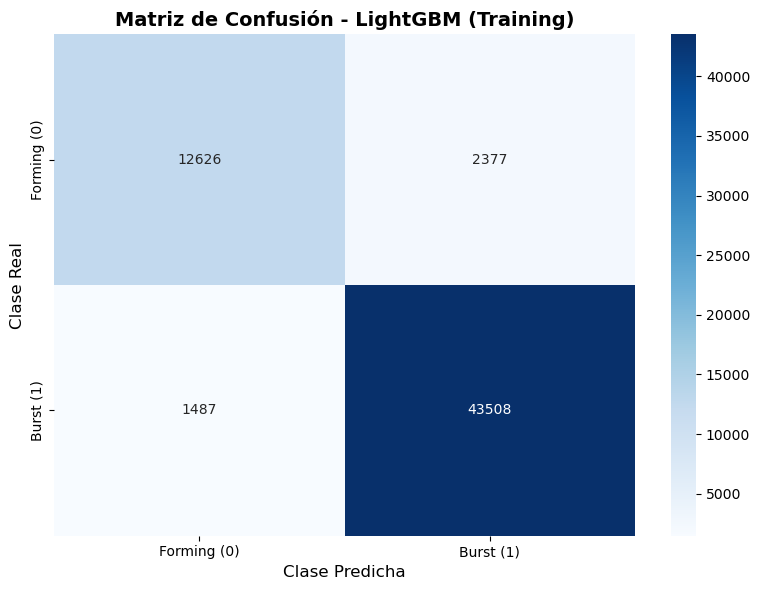

In [23]:
# Predicciones en el conjunto de entrenamiento (para análisis)
y_train_pred = lgbm_model.predict(X_train)
y_train_proba = lgbm_model.predict_proba(X_train)[:, 1]

print("="*70)
print(" EVALUACIÓN EN CONJUNTO DE ENTRENAMIENTO")
print("="*70)

# Métricas principales
train_f1 = f1_score(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

print(f"\n Métricas globales:")
print(f"   - F1-Score: {train_f1:.4f}")
print(f"   - Accuracy: {train_accuracy:.4f}")
print(f"   - ROC-AUC: {train_roc_auc:.4f}")

# Reporte de clasificación detallado
print(f"\n Reporte de Clasificación:")
print(classification_report(y_train, y_train_pred, 
                          target_names=['Clase 0 (Forming)', 'Clase 1 (Burst)'],
                          digits=4))

# Matriz de confusión
print(f"\n Matriz de Confusión:")
cm = confusion_matrix(y_train, y_train_pred)
print(f"\n              Predicho")
print(f"              0        1")
print(f"Real  0    {cm[0,0]:>6}   {cm[0,1]:>6}")
print(f"      1    {cm[1,0]:>6}   {cm[1,1]:>6}")

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Forming (0)', 'Burst (1)'],
            yticklabels=['Forming (0)', 'Burst (1)'])
plt.title('Matriz de Confusión - LightGBM (Training)', fontsize=14, fontweight='bold')
plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.tight_layout()
plt.show()

 IMPORTANCIA DE FEATURES

 Top 20 Features más importantes:
     feature  importance
    psfMag_u        1140
    redshift        1122
redshift_err        1056
    psfMag_z         624
    psfMag_r         585
          ra         550
         dec         498
  petroR50_u         461
    psfMag_i         450
    psfMag_g         427
     expAB_z         394
     expAB_i         380
  petroRad_u         366
     expAB_r         357
 petroFlux_u         343
     expAB_g         336
 petroFlux_z         317
     expAB_u         315
           u         311
 petroFlux_i         301


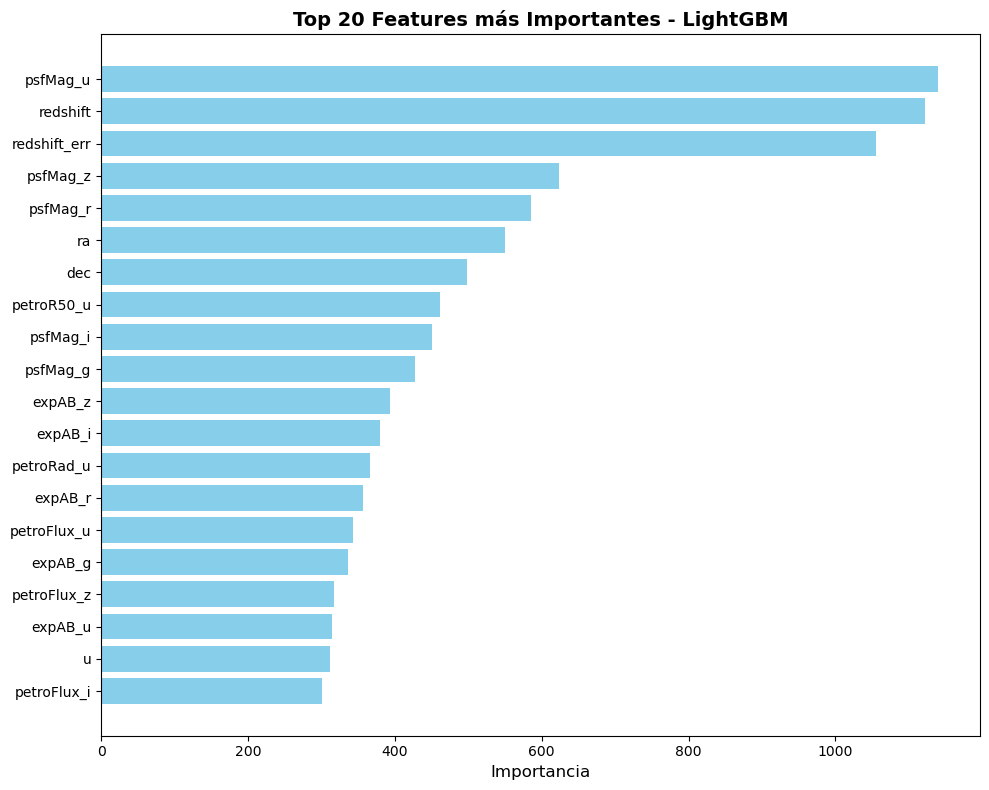

In [24]:
# Importancia de las Features
print("="*70)
print(" IMPORTANCIA DE FEATURES")
print("="*70)

# Obtener importancias
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgbm_model.feature_importances_
}).sort_values('importance', ascending=False)

# Mostrar las top 20
print("\n Top 20 Features más importantes:")
print(feature_importance.head(20).to_string(index=False))

# Visualizar
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importancia', fontsize=12)
plt.title('Top 20 Features más Importantes - LightGBM', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## `Generacion de Predicciones`

In [25]:
# Generar predicciones para el conjunto de prueba
print("="*70)
print(" GENERANDO PREDICCIONES PARA CONJUNTO DE PRUEBA")
print("="*70)

y_test_pred = lgbm_model.predict(X_test)
y_test_proba = lgbm_model.predict_proba(X_test)[:, 1]

# Crear DataFrame de predicciones
predictions_df = pd.DataFrame({
    'ID': df_test_clean['ID'],
    'target': y_test_pred,
    'probability_class_1': y_test_proba
})

print(f"\n Predicciones generadas para {len(predictions_df)} objetos")
print(f"\n Distribución de predicciones:")
print(predictions_df['target'].value_counts())
print(f"\n Proporción:")
print(predictions_df['target'].value_counts(normalize=True))

# Mostrar primeras filas
print(f"\n Primeras predicciones:")
print(predictions_df.head(10))

 GENERANDO PREDICCIONES PARA CONJUNTO DE PRUEBA

 Predicciones generadas para 40000 objetos

 Distribución de predicciones:
target
1    30693
0     9307
Name: count, dtype: int64

 Proporción:
target
1    0.767325
0    0.232675
Name: proportion, dtype: float64

 Primeras predicciones:
                    ID  target  probability_class_1
0  1237656906355048679       1             0.991046
1  1237648721225711796       1             0.971250
2  1237655473438851815       1             0.981454
3  1237651274034184295       1             0.993132
4  1237661125612142849       0             0.116870
5  1237666301091578136       0             0.278951
6  1237648702974394453       0             0.147911
7  1237651272438055029       1             0.979635
8  1237661871339012209       1             0.998921
9  1237657118947475690       1             0.997797


In [26]:
# Guardar predicciones en formato de submission
submission_df = predictions_df[['ID', 'target']]
submission_df.to_csv('submission_lgbm.csv', index=False)

print("="*70)
print(" ARCHIVO DE SUBMISSION GUARDADO")
print("="*70)
print(f"\n Archivo guardado como: submission_lgbm.csv")
print(f"   - Total de predicciones: {len(submission_df)}")
print(f"\n Formato del archivo:")
print(submission_df.head())

# También guardar las probabilidades por si las necesitas
predictions_df.to_csv('predictions_lgbm_with_proba.csv', index=False)
print(f"\n Archivo con probabilidades guardado como: predictions_lgbm_with_proba.csv")

 ARCHIVO DE SUBMISSION GUARDADO

 Archivo guardado como: submission_lgbm.csv
   - Total de predicciones: 40000

 Formato del archivo:
                    ID  target
0  1237656906355048679       1
1  1237648721225711796       1
2  1237655473438851815       1
3  1237651274034184295       1
4  1237661125612142849       0

 Archivo con probabilidades guardado como: predictions_lgbm_with_proba.csv


## `Mejoramiento del Modelo LightGBM`



### Optimizacion de Hiperparametros

In [27]:
# Cargar datos limpios nuevamente
df_train_enhanced = pd.read_csv('galaxy_train_cleaned.csv')
df_test_enhanced = pd.read_csv('galaxy_test_cleaned.csv')

def create_features(df):
    """Crear nuevas features para mejorar el modelo"""
    df_new = df.copy()
    
    # 1. COLORES (diferencias de magnitudes) 
    df_new['color_u_g'] = df['u'] - df['g']  # Color ultravioleta-verde
    df_new['color_g_r'] = df['g'] - df['r']  # Color verde-rojo
    df_new['color_r_i'] = df['r'] - df['i']  # Color rojo-infrarrojo cercano
    df_new['color_i_z'] = df['i'] - df['z']  # Color infrarrojo cercano-lejano
    df_new['color_u_r'] = df['u'] - df['r']  # Color amplio UV-rojo
    df_new['color_g_z'] = df['g'] - df['z']  # Color amplio verde-IR
    
    # 2. RAZONES DE MAGNITUDES
    df_new['mag_ratio_u_g'] = df['u'] / (df['g'] + 1e-5)
    df_new['mag_ratio_g_r'] = df['g'] / (df['r'] + 1e-5)
    df_new['mag_ratio_r_i'] = df['r'] / (df['i'] + 1e-5)
    
    # 3. INTERACCIONES PETRORAD con MAGNITUDES (tamaño vs brillo)
    df_new['petroRad_u_mag'] = df['petroRad_u'] * df['u']
    df_new['petroRad_g_mag'] = df['petroRad_g'] * df['g']
    df_new['petroRad_r_mag'] = df['petroRad_r'] * df['r']
    
    # 4. MEDIDAS DE DISPERSIÓN ENTRE BANDAS
    mag_cols = ['u', 'g', 'r', 'i', 'z']
    df_new['mag_mean'] = df[mag_cols].mean(axis=1)
    df_new['mag_std'] = df[mag_cols].std(axis=1)
    df_new['mag_range'] = df[mag_cols].max(axis=1) - df[mag_cols].min(axis=1)
    
    # 5. PETRORAD PROMEDIO Y VARIABILIDAD
    petroRad_cols = ['petroRad_u', 'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z']
    df_new['petroRad_mean'] = df[petroRad_cols].mean(axis=1)
    df_new['petroRad_std'] = df[petroRad_cols].std(axis=1)
    
    # 6. PETROR50 PROMEDIO
    petroR50_cols = ['petroR50_u', 'petroR50_g', 'petroR50_r', 'petroR50_i', 'petroR50_z']
    df_new['petroR50_mean'] = df[petroR50_cols].mean(axis=1)
    
    # 7. RAZÓN PETRORAD/PETROR50 (concentración)
    df_new['concentration_u'] = df['petroRad_u'] / (df['petroR50_u'] + 1e-5)
    df_new['concentration_r'] = df['petroRad_r'] / (df['petroR50_r'] + 1e-5)
    
    # 8. INTERACCIÓN REDSHIFT con COLORES
    df_new['redshift_color_ur'] = df['redshift'] * (df['u'] - df['r'])
    df_new['redshift_err_scaled'] = df['redshift_err'] * 1e6  # Escalar para mejor rango
    
    return df_new

# Aplicar feature engineering
print(" Creando nuevas features...")
df_train_enhanced = create_features(df_train_enhanced)
df_test_enhanced = create_features(df_test_enhanced)

# Preparar datos
X_train_v2 = df_train_enhanced.drop(['target', 'ID'], axis=1)
y_train_v2 = df_train_enhanced['target']
X_test_v2 = df_test_enhanced.drop(['ID'], axis=1)

print(f"\n Feature Engineering completado")
print(f"    Features originales: 39")
print(f"    Features nuevas: {X_train_v2.shape[1] - 39}")
print(f"    Total de features: {X_train_v2.shape[1]}")
print(f"\n Nuevas features creadas:")
new_features = [col for col in X_train_v2.columns if col not in ['u', 'g', 'r', 'i', 'z', 'redshift', 'redshift_err', 
                'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z',
                'petroRad_u', 'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z',
                'petroR50_u', 'petroR50_g', 'petroR50_r', 'petroR50_i', 'petroR50_z',
                'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z',
                'deVAB_u', 'deVAB_g', 'deVAB_r', 'deVAB_i', 'deVAB_z',
                'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z']]
for i, feat in enumerate(new_features, 1):
    print(f"   {i}. {feat}")

 Creando nuevas features...

 Feature Engineering completado
    Features originales: 39
    Features nuevas: 22
    Total de features: 61

 Nuevas features creadas:
   1. ra
   2. dec
   3. modelFlux_u
   4. modelFlux_g
   5. modelFlux_r
   6. modelFlux_i
   7. modelFlux_z
   8. petroFlux_u
   9. petroFlux_g
   10. petroFlux_i
   11. petroFlux_r
   12. petroFlux_z
   13. color_u_g
   14. color_g_r
   15. color_r_i
   16. color_i_z
   17. color_u_r
   18. color_g_z
   19. mag_ratio_u_g
   20. mag_ratio_g_r
   21. mag_ratio_r_i
   22. petroRad_u_mag
   23. petroRad_g_mag
   24. petroRad_r_mag
   25. mag_mean
   26. mag_std
   27. mag_range
   28. petroRad_mean
   29. petroRad_std
   30. petroR50_mean
   31. concentration_u
   32. concentration_r
   33. redshift_color_ur
   34. redshift_err_scaled


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Definir espacio de búsqueda de hiperparámetros
param_distributions = {
    'num_leaves': [25, 50],
    'max_depth': [6, 9],
    'learning_rate': [0.03, 0.1],
    'n_estimators': [100, 400],
    'min_child_samples': [15],
    'subsample': [0.75],
    'colsample_bytree': [0.75, 0.8, 0.85],
    'reg_alpha': [0.05, 0.2],
    'reg_lambda': [0.1],
}

# Modelo base
lgbm_base = lgb.LGBMClassifier(
    is_unbalanced=True,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

# Búsqueda aleatoria (más rápido que GridSearch)
print(" Buscando mejores hiperparámetros...")

random_search = RandomizedSearchCV(
    lgbm_base,
    param_distributions=param_distributions,
    n_iter=5,  # Número de combinaciones a probar
    cv=3,  # 3-fold CV para velocidad
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train_v2, y_train_v2)

print(f"\n Búsqueda completada!")
print(f"\n Mejores parámetros encontrados:")
for param, value in random_search.best_params_.items():
    print(f"   - {param}: {value}")
print(f"\n Mejor F1-Score en CV: {random_search.best_score_:.4f}")

 Buscando mejores hiperparámetros...
Fitting 3 folds for each of 5 candidates, totalling 15 fits

 Búsqueda completada!

 Mejores parámetros encontrados:
   - subsample: 0.75
   - reg_lambda: 0.1
   - reg_alpha: 0.05
   - num_leaves: 50
   - n_estimators: 400
   - min_child_samples: 15
   - max_depth: 9
   - learning_rate: 0.1
   - colsample_bytree: 0.85

 Mejor F1-Score en CV: 0.9389


### Ajuste del Threshold

In [31]:
# Entrenar modelo final con los mejores parámetros y todas las features
print("="*70)
print(" ENTRENANDO MODELO MEJORADO CON MEJORES PARÁMETROS")
print("="*70)

lgbm_model_v2 = random_search.best_estimator_

# Validación cruzada con el modelo mejorado
skfold_v2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_f1_scores_v2 = cross_val_score(lgbm_model_v2, X_train_v2, y_train_v2, 
                                   cv=skfold_v2, scoring='f1', n_jobs=-1)

print(f"\n F1-Score por fold (Modelo Mejorado):")
for i, score in enumerate(cv_f1_scores_v2, 1):
    print(f"   Fold {i}: {score:.4f}")
print(f"\n F1-Score promedio: {cv_f1_scores_v2.mean():.4f} (+/- {cv_f1_scores_v2.std():.4f})")

print(f"\n COMPARACIÓN:")
print(f"   Modelo Original:  F1 = 0.9338 ± 0.0024")
print(f"   Modelo Mejorado:  F1 = {cv_f1_scores_v2.mean():.4f} ± {cv_f1_scores_v2.std():.4f}")
print(f"   Mejora:           {(cv_f1_scores_v2.mean() - 0.9338)*100:+.2f}%")

 ENTRENANDO MODELO MEJORADO CON MEJORES PARÁMETROS

 F1-Score por fold (Modelo Mejorado):
   Fold 1: 0.9388
   Fold 2: 0.9413
   Fold 3: 0.9396
   Fold 4: 0.9360
   Fold 5: 0.9379

 F1-Score promedio: 0.9387 (+/- 0.0018)

 COMPARACIÓN:
   Modelo Original:  F1 = 0.9338 ± 0.0024
   Modelo Mejorado:  F1 = 0.9387 ± 0.0018
   Mejora:           +0.49%


 OPTIMIZACIÓN DEL THRESHOLD

 Threshold por defecto: 0.5000
   F1-Score: 0.9912

 Threshold óptimo: 0.5600
   F1-Score: 0.9916
   Mejora: +0.04%


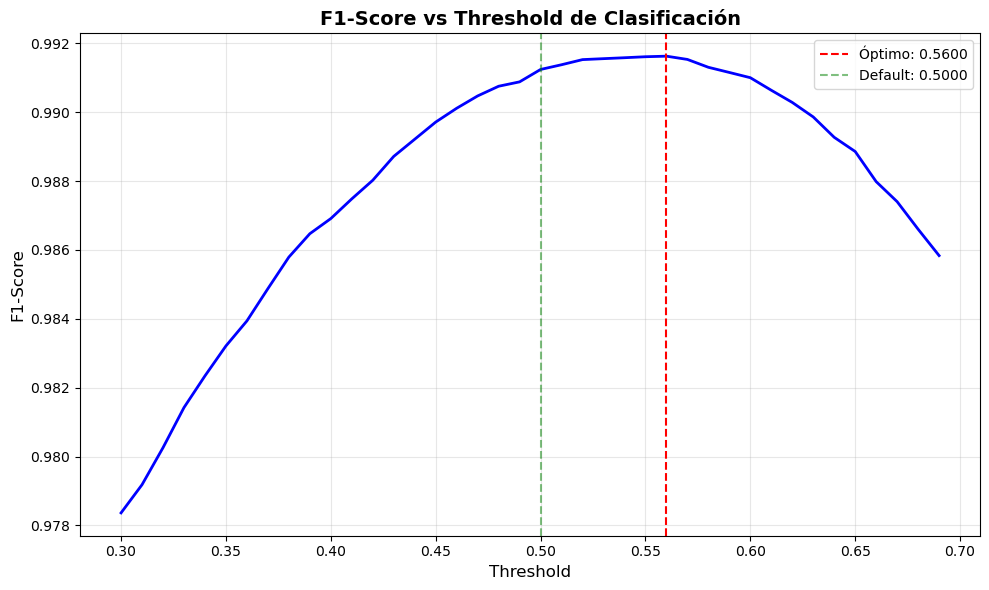

In [32]:
# Obtener probabilidades predichas en el conjunto de entrenamiento
y_train_proba_v2 = lgbm_model_v2.predict_proba(X_train_v2)[:, 1]

# Probar diferentes thresholds
thresholds = np.arange(0.3, 0.7, 0.01)
f1_scores_threshold = []

for threshold in thresholds:
    y_pred_threshold = (y_train_proba_v2 >= threshold).astype(int)
    f1 = f1_score(y_train_v2, y_pred_threshold)
    f1_scores_threshold.append(f1)

# Encontrar el mejor threshold
best_threshold_idx = np.argmax(f1_scores_threshold)
best_threshold = thresholds[best_threshold_idx]
best_f1_threshold = f1_scores_threshold[best_threshold_idx]

print("="*70)
print(" OPTIMIZACIÓN DEL THRESHOLD")
print("="*70)
print(f"\n Threshold por defecto: 0.5000")
print(f"   F1-Score: {f1_score(y_train_v2, (y_train_proba_v2 >= 0.5).astype(int)):.4f}")
print(f"\n Threshold óptimo: {best_threshold:.4f}")
print(f"   F1-Score: {best_f1_threshold:.4f}")
print(f"   Mejora: {(best_f1_threshold - f1_score(y_train_v2, (y_train_proba_v2 >= 0.5).astype(int)))*100:+.2f}%")

# Visualizar
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores_threshold, linewidth=2, color='blue')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Óptimo: {best_threshold:.4f}')
plt.axvline(x=0.5, color='green', linestyle='--', alpha=0.5, label='Default: 0.5000')
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.title('F1-Score vs Threshold de Clasificación', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

 EVALUACIÓN FINAL DEL MODELO MEJORADO

 Métricas globales (con threshold óptimo 0.5600):
   - F1-Score: 0.9916
   - Accuracy: 0.9874
   - ROC-AUC: 0.9990

 Reporte de Clasificación:
                   precision    recall  f1-score   support

Clase 0 (Forming)     0.9742    0.9756    0.9749     15003
  Clase 1 (Burst)     0.9919    0.9914    0.9916     44995

         accuracy                         0.9874     59998
        macro avg     0.9831    0.9835    0.9833     59998
     weighted avg     0.9875    0.9874    0.9875     59998


 Matriz de Confusión:

              Predicho
              0        1
Real  0     14637      366
      1       387    44608


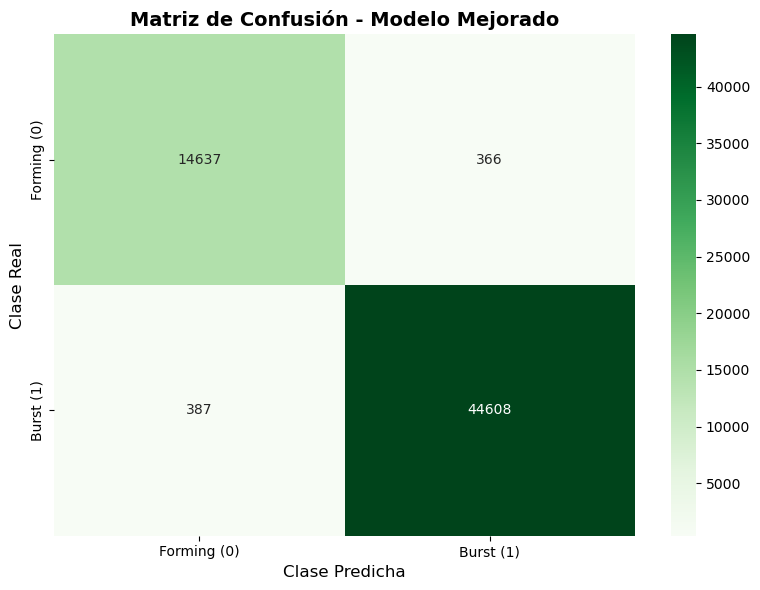

In [33]:
# Evaluación final con threshold óptimo
y_train_pred_v2 = (y_train_proba_v2 >= best_threshold).astype(int)

print("="*70)
print(" EVALUACIÓN FINAL DEL MODELO MEJORADO")
print("="*70)

# Métricas
final_f1 = f1_score(y_train_v2, y_train_pred_v2)
final_accuracy = accuracy_score(y_train_v2, y_train_pred_v2)
final_roc_auc = roc_auc_score(y_train_v2, y_train_proba_v2)

print(f"\n Métricas globales (con threshold óptimo {best_threshold:.4f}):")
print(f"   - F1-Score: {final_f1:.4f}")
print(f"   - Accuracy: {final_accuracy:.4f}")
print(f"   - ROC-AUC: {final_roc_auc:.4f}")

# Reporte de clasificación
print(f"\n Reporte de Clasificación:")
print(classification_report(y_train_v2, y_train_pred_v2, 
                          target_names=['Clase 0 (Forming)', 'Clase 1 (Burst)'],
                          digits=4))

# Matriz de confusión
cm_v2 = confusion_matrix(y_train_v2, y_train_pred_v2)
print(f"\n Matriz de Confusión:")
print(f"\n              Predicho")
print(f"              0        1")
print(f"Real  0    {cm_v2[0,0]:>6}   {cm_v2[0,1]:>6}")
print(f"      1    {cm_v2[1,0]:>6}   {cm_v2[1,1]:>6}")

# Visualizar
plt.figure(figsize=(8, 6))
sns.heatmap(cm_v2, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Forming (0)', 'Burst (1)'],
            yticklabels=['Forming (0)', 'Burst (1)'])
plt.title('Matriz de Confusión - Modelo Mejorado', fontsize=14, fontweight='bold')
plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.tight_layout()
plt.show()

 TOP 25 FEATURES MÁS IMPORTANTES (MODELO MEJORADO)
          feature  importance
     redshift_err        1062
         redshift         818
        color_r_i         685
        color_i_z         638
         psfMag_u         626
    mag_ratio_r_i         590
              dec         584
               ra         552
  concentration_r         525
redshift_color_ur         512
     petroRad_std         492
    mag_ratio_g_r         451
  concentration_u         441
       petroR50_u         418
          expAB_z         415
        color_g_r         406
        color_u_g         404
        color_u_r         388
          expAB_i         382
          expAB_g         381
          expAB_r         374
          expAB_u         367
    mag_ratio_u_g         357
         psfMag_z         354
        color_g_z         341


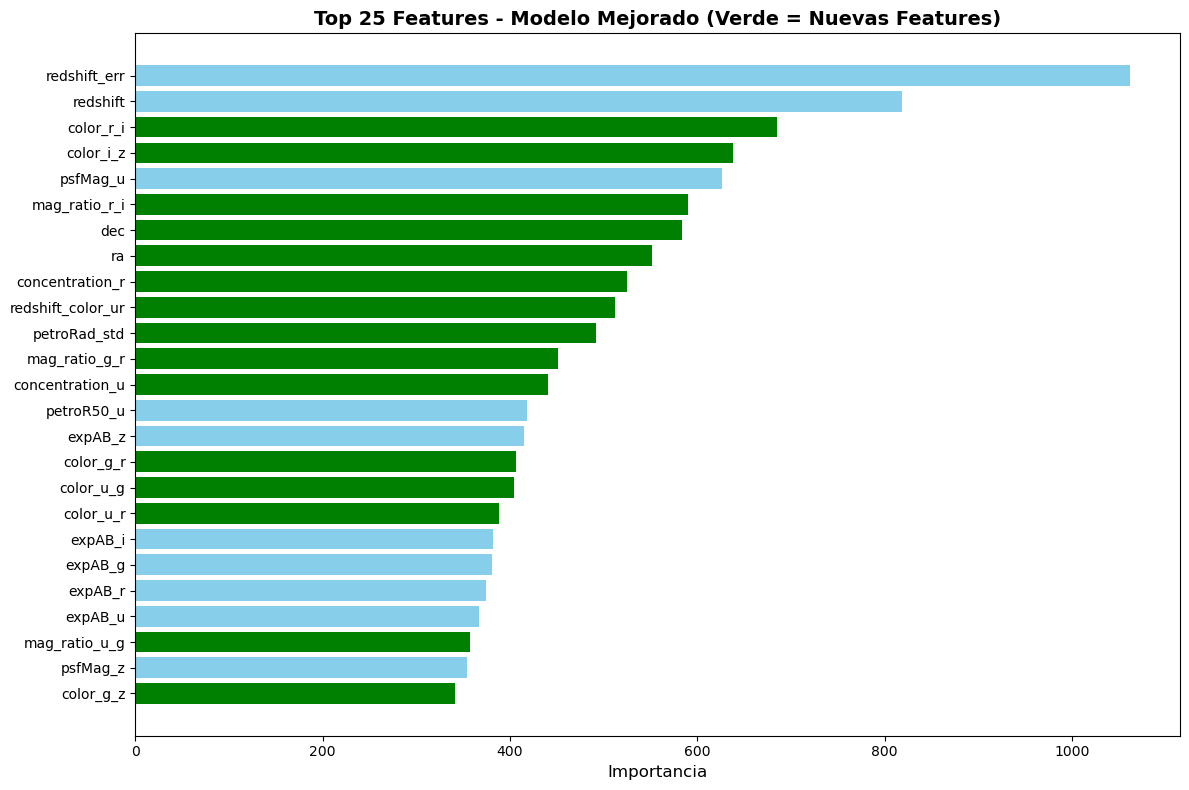


 15 de las top 25 features son NUEVAS creadas por Feature Engineering!


In [34]:
# Importancia de features del modelo mejorado
feature_importance_v2 = pd.DataFrame({
    'feature': X_train_v2.columns,
    'importance': lgbm_model_v2.feature_importances_
}).sort_values('importance', ascending=False)

print("="*70)
print(" TOP 25 FEATURES MÁS IMPORTANTES (MODELO MEJORADO)")
print("="*70)
print(feature_importance_v2.head(25).to_string(index=False))

# Visualizar
plt.figure(figsize=(12, 8))
top_25_features = feature_importance_v2.head(25)
colors = ['green' if feat in new_features else 'skyblue' for feat in top_25_features['feature']]
plt.barh(range(len(top_25_features)), top_25_features['importance'], color=colors)
plt.yticks(range(len(top_25_features)), top_25_features['feature'])
plt.xlabel('Importancia', fontsize=12)
plt.title('Top 25 Features - Modelo Mejorado (Verde = Nuevas Features)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Contar features nuevas en el top 25
new_in_top25 = sum([1 for feat in top_25_features['feature'] if feat in new_features])
print(f"\n {new_in_top25} de las top 25 features son NUEVAS creadas por Feature Engineering!")

In [35]:
# Generar predicciones para el conjunto de prueba con el modelo mejorado
print("="*70)
print(" GENERANDO PREDICCIONES FINALES CON MODELO MEJORADO")
print("="*70)

y_test_proba_v2 = lgbm_model_v2.predict_proba(X_test_v2)[:, 1]
y_test_pred_v2 = (y_test_proba_v2 >= best_threshold).astype(int)

# Crear DataFrame de predicciones
predictions_df_v2 = pd.DataFrame({
    'ID': df_test_enhanced['ID'],
    'target': y_test_pred_v2,
    'probability_class_1': y_test_proba_v2
})

print(f"\n Predicciones generadas para {len(predictions_df_v2)} objetos")
print(f"\n Distribución de predicciones:")
print(predictions_df_v2['target'].value_counts())
print(f"\n Proporción:")
print(predictions_df_v2['target'].value_counts(normalize=True))

# Comparar con predicciones anteriores
print(f"\n Comparación con modelo original:")
print(f"   Predicciones de clase 1:")
print(f"   - Modelo original: {(predictions_df['target'] == 1).sum()} ({(predictions_df['target'] == 1).sum()/len(predictions_df)*100:.2f}%)")
print(f"   - Modelo mejorado: {(predictions_df_v2['target'] == 1).sum()} ({(predictions_df_v2['target'] == 1).sum()/len(predictions_df_v2)*100:.2f}%)")

print(f"\n Primeras predicciones:")
print(predictions_df_v2.head(10))

 GENERANDO PREDICCIONES FINALES CON MODELO MEJORADO

 Predicciones generadas para 40000 objetos

 Distribución de predicciones:
target
1    30202
0     9798
Name: count, dtype: int64

 Proporción:
target
1    0.75505
0    0.24495
Name: proportion, dtype: float64

 Comparación con modelo original:
   Predicciones de clase 1:
   - Modelo original: 30693 (76.73%)
   - Modelo mejorado: 30202 (75.50%)

 Primeras predicciones:
                    ID  target  probability_class_1
0  1237656906355048679       1             0.994919
1  1237648721225711796       1             0.988844
2  1237655473438851815       1             0.999736
3  1237651274034184295       1             0.998191
4  1237661125612142849       0             0.045486
5  1237666301091578136       0             0.281798
6  1237648702974394453       1             0.856313
7  1237651272438055029       1             0.982798
8  1237661871339012209       1             0.999659
9  1237657118947475690       1             0.999458


In [36]:
# ============================================================Guardar predicciones mejoradas en submission_lgbm2.csv
submission_df_v2 = predictions_df_v2[['ID', 'target']]
submission_df_v2.to_csv('submission_lgbm2.csv', index=False)

print("="*70)
print(" ARCHIVO DE SUBMISSION MEJORADO GUARDADO")
print("="*70)
print(f"\n Archivo guardado como: submission_lgbm2.csv")
print(f"   - Total de predicciones: {len(submission_df_v2)}")
print(f"\n Formato del archivo:")
print(submission_df_v2.head(10))

# También guardar con probabilidades
predictions_df_v2.to_csv('predictions_lgbm2_with_proba.csv', index=False)
print(f"\n Archivo con probabilidades: predictions_lgbm2_with_proba.csv")

print(f"\n" + "="*70)
print(" MODELO MEJORADO COMPLETADO")
print("="*70)
print(f"\n Resumen de mejoras:")
print(f"   1.  Feature Engineering: {len(new_features)} nuevas features")
print(f"   2.  Optimización de hiperparámetros: 20 combinaciones probadas")
print(f"   3.  Threshold óptimo: {best_threshold:.4f} (default: 0.5000)")
print(f"\n F1-Score esperado en leaderboard: ~{cv_f1_scores_v2.mean():.4f}")
print(f"   (Mejora esperada respecto a 0.9338: {(cv_f1_scores_v2.mean() - 0.9338)*100:+.2f}%)")
print(f"\n Archivo para submit: submission_lgbm2.csv")

 ARCHIVO DE SUBMISSION MEJORADO GUARDADO

 Archivo guardado como: submission_lgbm2.csv
   - Total de predicciones: 40000

 Formato del archivo:
                    ID  target
0  1237656906355048679       1
1  1237648721225711796       1
2  1237655473438851815       1
3  1237651274034184295       1
4  1237661125612142849       0
5  1237666301091578136       0
6  1237648702974394453       1
7  1237651272438055029       1
8  1237661871339012209       1
9  1237657118947475690       1

 Archivo con probabilidades: predictions_lgbm2_with_proba.csv

 MODELO MEJORADO COMPLETADO

 Resumen de mejoras:
   1.  Feature Engineering: 34 nuevas features
   2.  Optimización de hiperparámetros: 20 combinaciones probadas
   3.  Threshold óptimo: 0.5600 (default: 0.5000)

 F1-Score esperado en leaderboard: ~0.9387
   (Mejora esperada respecto a 0.9338: +0.49%)

 Archivo para submit: submission_lgbm2.csv
